# Project- Restaurant food price

In [1]:
#lets import pandas library to read the CSV data
import pandas as pd
df = pd.read_excel('Data_Train.xlsx')
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [2]:
#Check the columns name
df.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

In [3]:
#Lets check the null value is present in any of the column
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

Null values are present in column. So we have to fill it.

In [4]:
df.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST              int64
dtype: object

In [5]:
df["VOTES"].fillna(0,inplace=True)
df["VOTES"].loc[df["VOTES"].str[-5:]=="votes"]=df["VOTES"].loc[df["VOTES"].str[-5:]=="votes"].str.rstrip("votes")
df["VOTES"]=df["VOTES"].astype(int)

C:\Users\Anirudha\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [6]:
df["RATING"].replace("NEW",0,inplace=True)
df["RATING"].replace("-",0,inplace=True)
df["RATING"].fillna(0,inplace=True)

In [7]:
df["RATING"]=df["RATING"].astype(float)

In [8]:
#Now we will impute "CITY" and "LOCALITY" as missing
df["CITY"].fillna("missing",inplace=True)
df["LOCALITY"].fillna("missing",inplace=True)

In [9]:
#Lets chcek the null values again
df.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64

In [10]:
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165,300


Restaurant Id and Time is of no use as it will not affect our data. So we have to drop it.

In [11]:
df.drop(columns=['RESTAURANT_ID'],inplace=True)
df.drop(columns=['TIME'],inplace=True)

In [12]:
df.head()

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,"Malwani, Goan, North Indian",Thane,Dombivali East,3.6,49,1200
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",Chennai,Ramapuram,4.2,30,1500
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi",Chennai,Saligramam,3.8,221,800
3,QUICK BITES,"Tibetan, Chinese",Mumbai,Bandra West,4.1,24,800
4,DESSERT PARLOR,Desserts,Mumbai,Lower Parel,3.8,165,300


In [13]:
df.drop(columns=['CUISINES'],inplace=True)
df.drop(columns=['TITLE'],inplace=True)

In [14]:
#get the summary
df.describe()

,RATING,VOTES,COST
count,12690.000000,12690.000000,12690.000000
mean,3.426296,376.231127,655.252246
std,1.179799,810.946942,627.003540
min,0.000000,0.000000,20.000000
25%,3.400000,39.250000,300.000000
50%,3.800000,132.000000,500.000000
75%,4.000000,405.000000,800.000000
max,4.900000,41186.000000,14000.000000


In [15]:
df.head()

,CITY,LOCALITY,RATING,VOTES,COST
0,Thane,Dombivali East,3.6,49,1200
1,Chennai,Ramapuram,4.2,30,1500
2,Chennai,Saligramam,3.8,221,800
3,Mumbai,Bandra West,4.1,24,800
4,Mumbai,Lower Parel,3.8,165,300


# EDA

# Univariate

In [16]:
df['CITY'].value_counts()

Chennai                2174
Bangalore              2149
Hyderabad              1819
Mumbai                 1722
New Delhi              1321
                       ... 
Near Reliance Fresh       1
Naharpar                  1
Indirapuram               1
Kerala 682024             1
Ponnuruni Kochi           1
Name: CITY, Length: 360, dtype: int64

In [17]:
df['LOCALITY'].value_counts()

Gachibowli                                166
Indiranagar                               138
Edappally                                 122
Kakkanad                                  121
HSR                                       120
                                         ... 
Sector 70                                   1
Nizamuddin                                  1
Opposite ATC Shoping Mall As Rao Nagar      1
Gurugram                                    1
Beside Apollo Pharmacy                      1
Name: LOCALITY, Length: 1417, dtype: int64

In [18]:
df['RATING'].value_counts()

3.9    1238
0.0    1204
3.8    1190
4.0    1099
3.7    1086
3.6     951
4.1     936
3.5     771
4.2     723
3.4     575
4.3     556
3.3     365
4.4     362
3.2     266
4.5     199
2.9     186
3.1     186
3.0     170
2.8     146
4.6     141
2.7      89
4.7      69
2.6      61
2.5      35
4.8      32
4.9      22
2.4      15
2.3      10
2.1       3
2.2       2
2.0       2
Name: RATING, dtype: int64

In [19]:
df['VOTES'].value_counts()

0       1204
44        71
29        66
28        66
38        65
        ... 
2043       1
1971       1
1923       1
1899       1
2039       1
Name: VOTES, Length: 1848, dtype: int64

In [20]:
df['COST'].value_counts()

300      1595
400      1357
500      1300
200      1031
600       806
         ... 
4100        1
70          1
14000       1
1950        1
80          1
Name: COST, Length: 86, dtype: int64

In [22]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
le=LabelEncoder()
for columns in df.columns:
    if df[columns].dtype==np.number:
        continue
    df[columns]=le.fit_transform(df[columns])

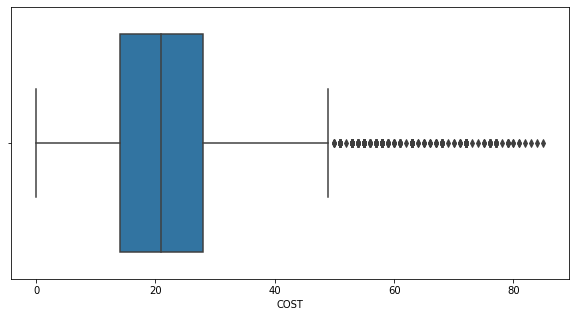

In [23]:
#lets see the columns graphically to understand more clearly using some visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(10,5))
sns.boxplot(x='COST',data=df)
plt.show()

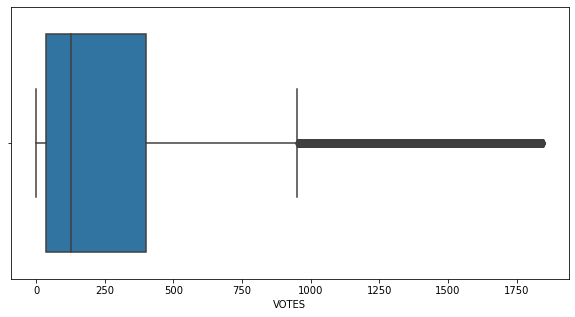

In [24]:
plt.subplots(figsize=(10,5))
sns.boxplot(x='VOTES',data=df)
plt.show()

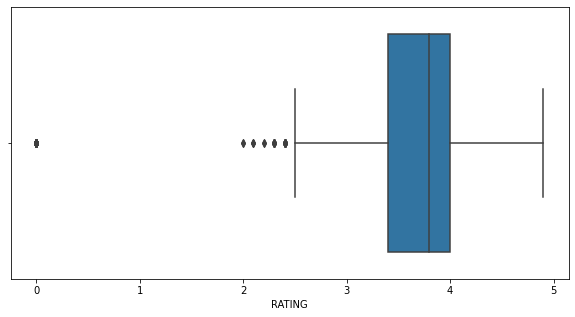

In [25]:
plt.subplots(figsize=(10,5))
sns.boxplot(x='RATING',data=df)
plt.show()

# Bivariate

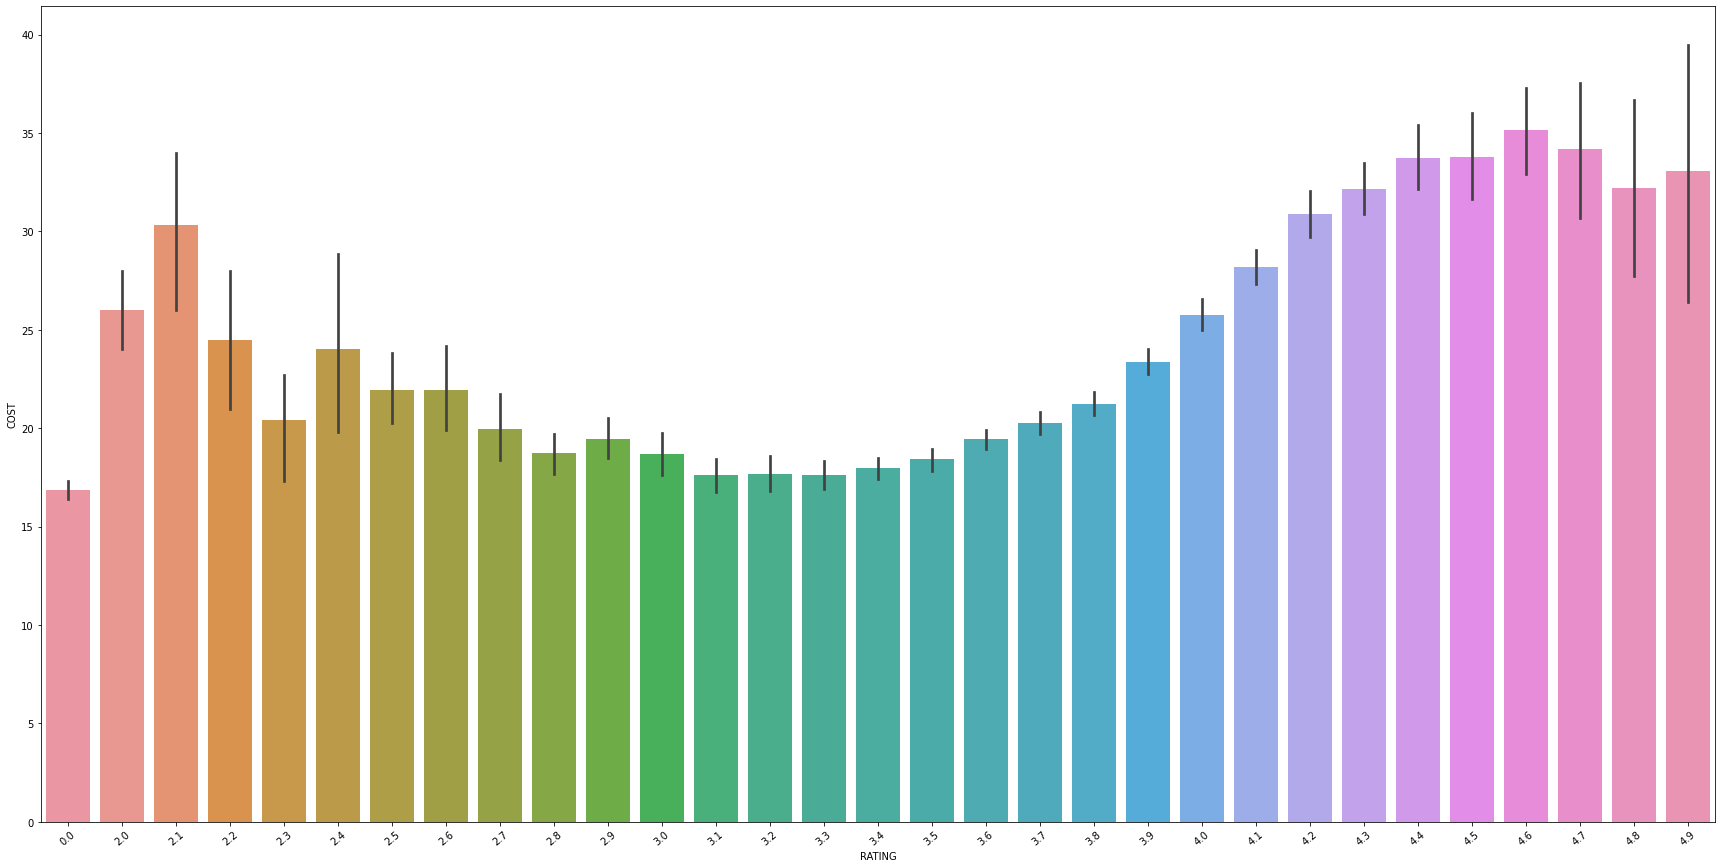

In [26]:
#Lets check Cost vs other varibles
plt.figure(figsize=(30,15))
sns.barplot(x='RATING',y='COST',data=df)
plt.xticks(rotation=40)
plt.show()

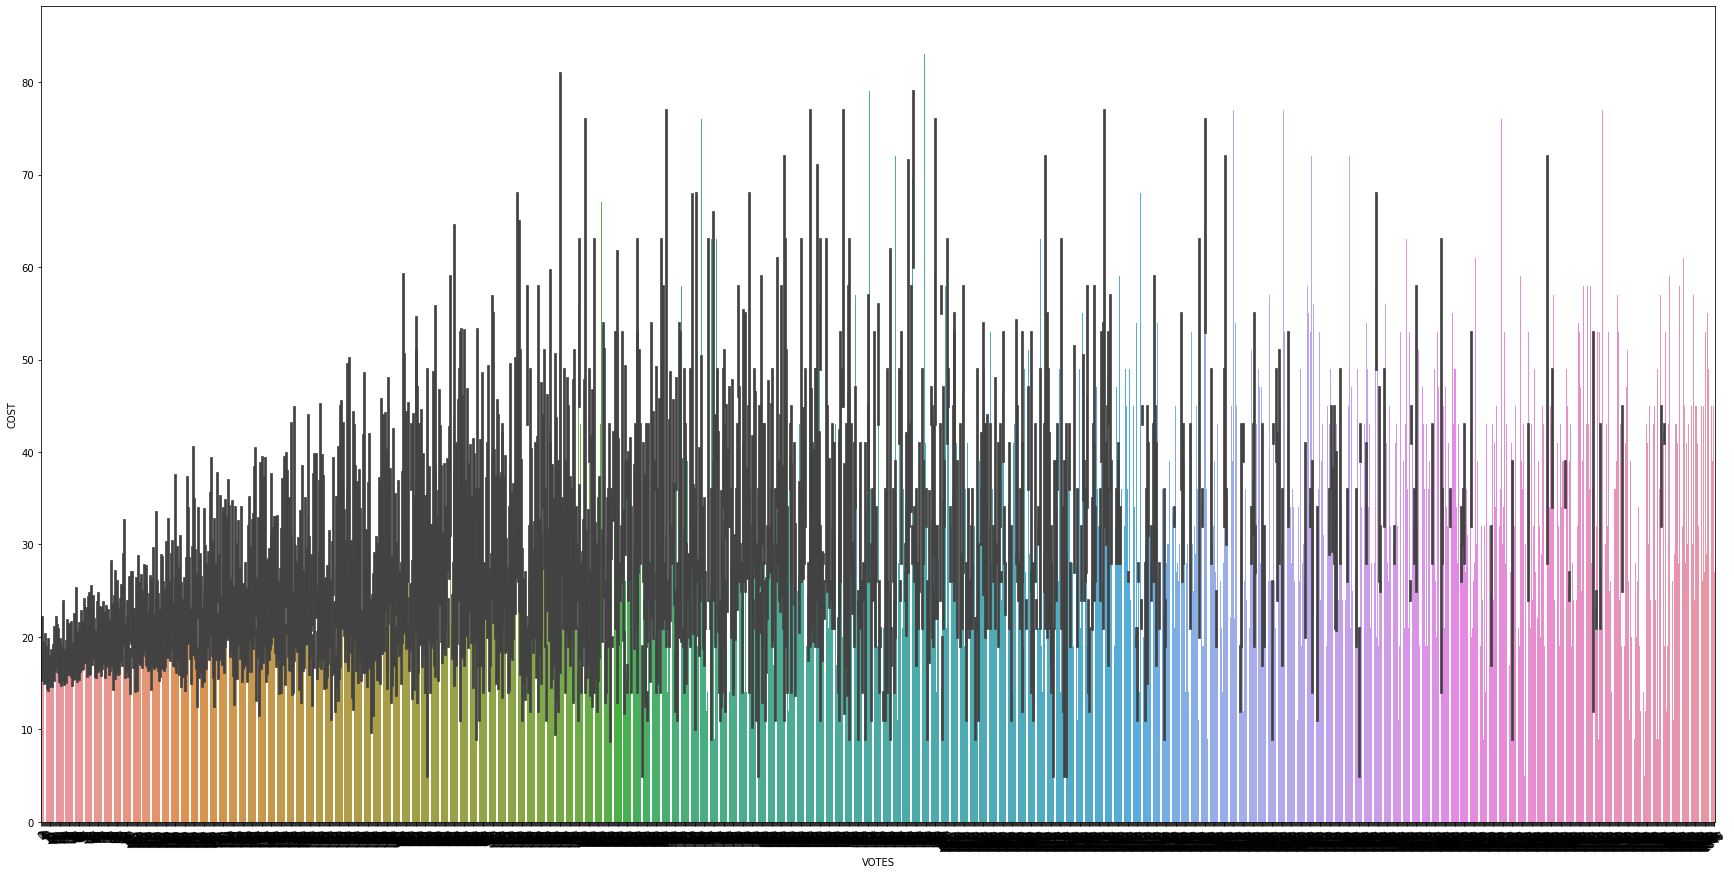

In [27]:
plt.figure(figsize=(30,15))
sns.barplot(x='VOTES',y='COST',data=df)
plt.xticks(rotation=40)
plt.show()

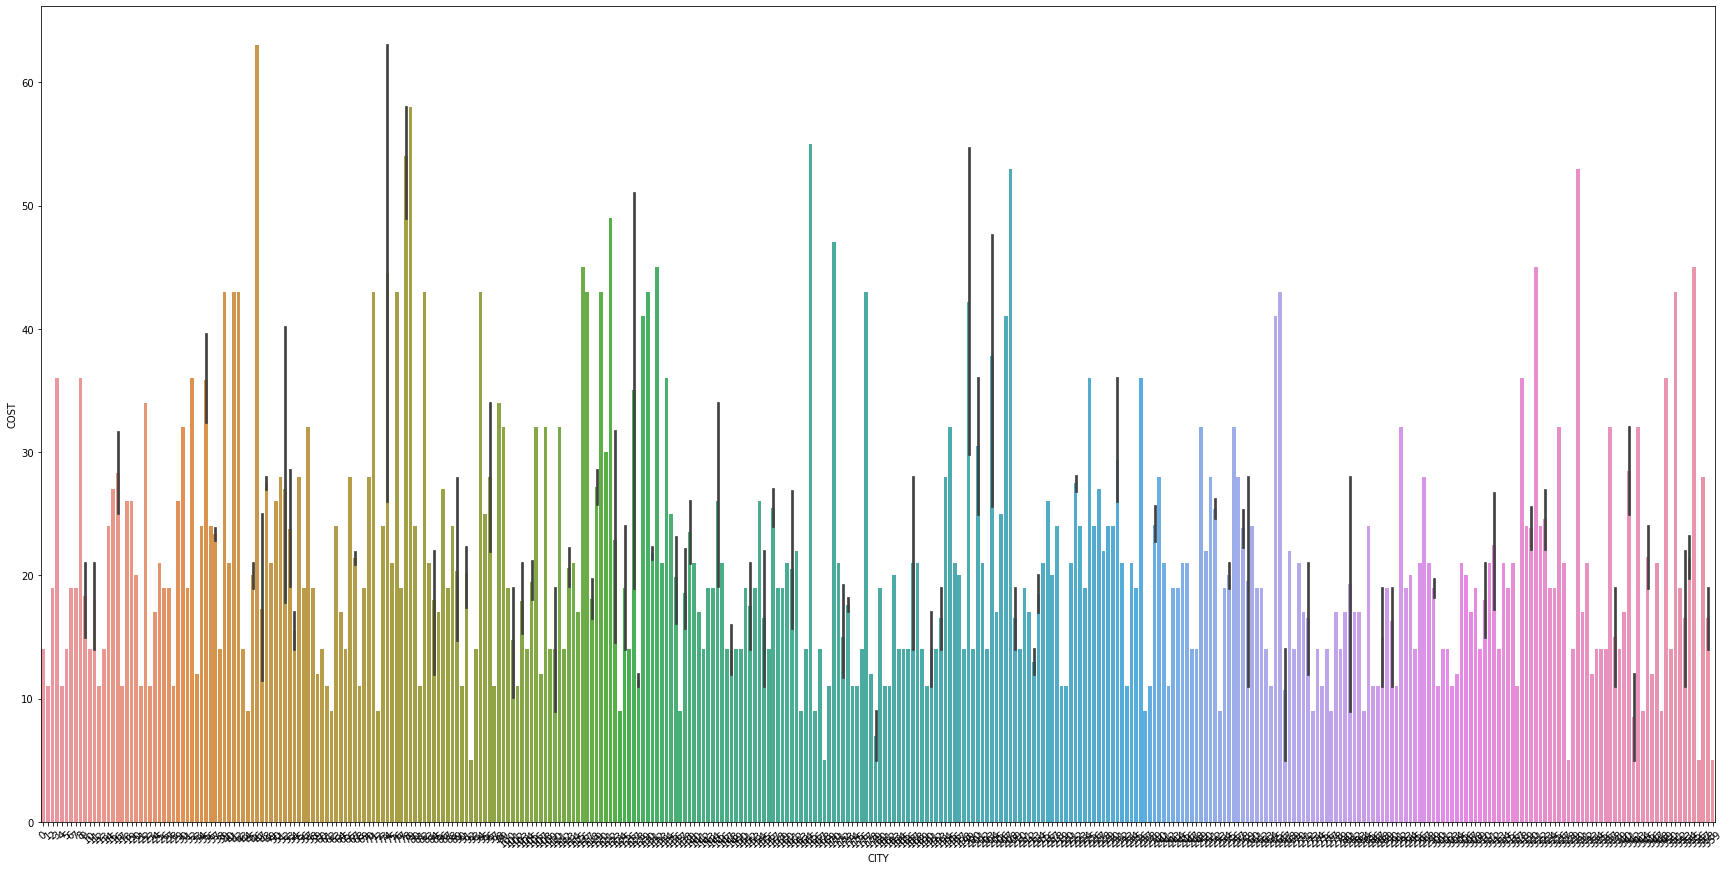

In [28]:
plt.figure(figsize=(30,15))
sns.barplot(x='CITY',y='COST',data=df)
plt.xticks(rotation=40)
plt.show()

# Correlation between columns

In [29]:
df.corr()

,CITY,LOCALITY,RATING,VOTES,COST
CITY,1.000000,0.069816,-0.056862,0.072511,0.042699
LOCALITY,0.069816,1.000000,-0.021238,-0.047190,-0.018067
RATING,-0.056862,-0.021238,1.000000,0.386194,0.267914
VOTES,0.072511,-0.047190,0.386194,1.000000,0.420958
COST,0.042699,-0.018067,0.267914,0.420958,1.000000


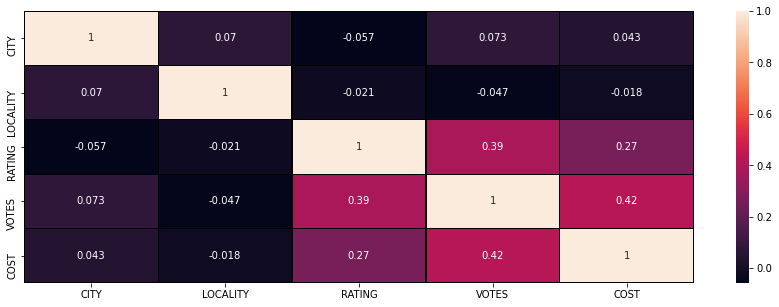

In [30]:
#lets check the correlation using heatmap for better understanding
plt.subplots(figsize=(15,5))
sns.heatmap(df.corr(),linewidths=.1,linecolor='black', annot=True)

From above we can say that Votes and rating have good positive correlation with target variable Cost.

# Checking Outliers

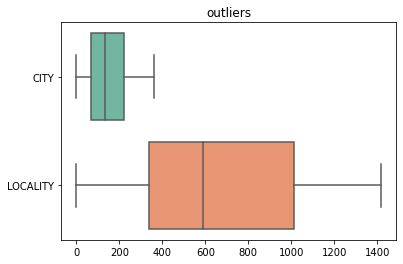

In [31]:
sns.boxplot(data=df[['CITY','LOCALITY']],orient='h',palette='Set2')
plt.title('outliers')
plt.show()

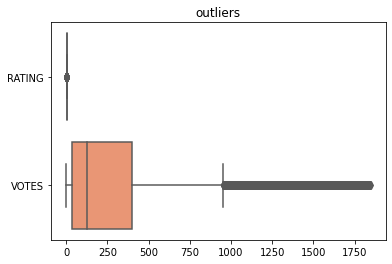

In [32]:
sns.boxplot(data=df[['RATING','VOTES']],orient='h',palette='Set2')
plt.title('outliers')
plt.show()

there are some outliers in votes column. so we have to remove it.

In [33]:
#lets check the skewness of all columns
df.skew()

CITY        0.297804
LOCALITY    0.333505
RATING     -2.214271
VOTES       1.868231
COST        1.534165
dtype: float64

# Removing Outliers

In [34]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
thresholds=3
df_new=df[(z<3).all(axis=1)]

In [35]:
print([df.shape],[df_new.shape])

[(12690, 5)] [(12139, 5)]


# Percentage loss

In [36]:
percent_loss=((551/12690)*100)
print(percent_loss)

4.3420015760441295


Percent loss is not more than 5%. So no need to remove outliers

In [37]:
#lets split the data into x and y variable(input & output)
x=df.drop(columns=["COST"])
y=df[["COST"]] #this is our target variable

In [39]:
#finding best random state
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

best_rstate=0
accu=0
for i in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=i)
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    y_pred=mod.predict(x_test)
    tempaccu=r2_score(y_test,y_pred)
    if tempaccu>accu:
        accu=tempaccu
        best_rstate=i
        
print(f'Best accuracy {accu*100} on random_state {best_rstate}')        
    

Best accuracy 21.84236163709893 on random_state 67


In [40]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,df_x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
rfr=RandomForestRegressor()
parameters = {"n_estimators":[10,100,500]}
clf = GridSearchCV(rfr, parameters, cv=5,scoring="r2")
clf.fit(x,y)
clf.best_params_

{'n_estimators': 500}

In [42]:
rfr=RandomForestRegressor(n_estimators=500)
r_state=maxr2_score(rfr,x,y)

r2 score corresponding to  42  is  0.2150635754964494
r2 score corresponding to  43  is  0.2587415094211062
r2 score corresponding to  44  is  0.24632930119912466
r2 score corresponding to  45  is  0.2116504774664395
r2 score corresponding to  46  is  0.22804754372698255
r2 score corresponding to  47  is  0.24382942081177184
r2 score corresponding to  48  is  0.19619431331076442
r2 score corresponding to  49  is  0.20476457060447473
r2 score corresponding to  50  is  0.2206593618821885
r2 score corresponding to  51  is  0.223634056483895
r2 score corresponding to  52  is  0.21709233975650266
r2 score corresponding to  53  is  0.24371814234858813
r2 score corresponding to  54  is  0.23404531363408643
r2 score corresponding to  55  is  0.24230301749769168
r2 score corresponding to  56  is  0.22029194252762052
r2 score corresponding to  57  is  0.23925431432267918
r2 score corresponding to  58  is  0.2393036338658373
r2 score corresponding to  59  is  0.2324256279535697
r2 score correspon

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=81)

In [44]:
from sklearn.ensemble import AdaBoostRegressor
adb=AdaBoostRegressor()
adb.fit(x_train,y_train)
y_pred=adb.predict(x_test)
r2s=r2_score(y_test,y_pred)
cvs=cross_val_score(AdaBoostRegressor(),x_train,y_train,cv=5).mean()
print('Accuracy=',r2s*100,'cvs=',cvs*100)

Accuracy= -6.079415829219514 cvs= 4.692465549635207


In [49]:
from sklearn.ensemble import RandomForestRegressor
rg=RandomForestRegressor()
rg.fit(x_train,y_train)
y_pred=rg.predict(x_test)
r2s=r2_score(y_test,y_pred)
cvs=cross_val_score(RandomForestRegressor(),x_train,y_train,cv=5).mean()
print('Accuracy=',r2s*100,'cvs=',cvs*100)

Accuracy= 27.186586945108182 cvs= 22.16402914072454


# Model Saving

In [50]:
import pickle
filename='restaurant.pkl'
pickle.dump(rg,open(filename,'wb'))

# Using the Test dataset

In [51]:
#Loading the test data
test_df=pd.read_excel('Data_Test.xlsx')
test_df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


In [53]:
test_df.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES'],
      dtype='object')

In [54]:
#Preprocessing pipeline
test_df.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

In [56]:
test_df["RATING"].replace("NEW",0,inplace=True)
test_df["RATING"].replace("-",0,inplace=True)
test_df["RATING"].fillna(0,inplace=True)

In [57]:
test_df["RATING"]=test_df["RATING"].astype(float)

In [59]:
test_df.drop(columns=['CUISINES'],inplace=True)
test_df.drop(columns=['TITLE'],inplace=True)
test_df.drop(columns=['RESTAURANT_ID'],inplace=True)
test_df.drop(columns=['TIME'],inplace=True)

In [60]:
test_df["VOTES"].fillna(0,inplace=True)
test_df["VOTES"].loc[test_df["VOTES"].str[-5:]=="votes"]=test_df["VOTES"].loc[test_df["VOTES"].str[-5:]=="votes"].str.rstrip("votes")
test_df["VOTES"]=test_df["VOTES"].astype(int)

In [62]:
#Now we will impute "CITY" and "LOCALITY" as missing
test_df["CITY"].fillna("missing",inplace=True)
test_df["LOCALITY"].fillna("missing",inplace=True)

In [63]:
test_df.isnull().sum()

CITY        0
LOCALITY    0
RATING      0
VOTES       0
dtype: int64

In [64]:
#Load the model
fitted_model=pickle.load(open('restaurant.pkl','rb'))

In [65]:
fitted_model

RandomForestRegressor()